In [2]:
#Importar datos meteorologicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


file_path1='/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/Documentos intermedios/TempMadrid.csv'
file_path2='/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/Documentos intermedios/TempBilbao.csv'
file_path3='/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/Documentos intermedios/TempAndujar.csv'
df_mad = pd.read_csv(file_path1, encoding='latin-1')
df_bilb = pd.read_csv(file_path2, encoding='latin-1')
df_and = pd.read_csv(file_path3, encoding='latin-1')

In [3]:
import pandas as pd

# Cargar el DataFrame (por ejemplo, desde un archivo CSV)
df = pd.read_csv("/Users/anayaguemolina/Desktop/Trabajo Fin de Grado/Documentos intermedios/Andujartemps.csv")

# Eliminar una columna (por ejemplo, 'columna_a_eliminar')

df = df.drop('Unnamed: 0', axis=1)

# Verificar que la columna ha sido eliminada
print(df.head())
df.to_csv('TempAndujar.csv')


        FECHA  T.MaximaAnjudar  T.minimaAndujar  PrecipitaciónAndujar
0  2022-01-01             21.1              2.2                   0.0
1  2022-01-02             19.3              1.9                   0.0
2  2022-01-03             20.8              2.0                   0.0
3  2022-01-04             11.9              2.7                   3.8
4  2022-01-05             13.0              2.4                   4.8


In [4]:
# Asegurar que las fechas están en formato datetime
df_mad['FECHA'] = pd.to_datetime(df_mad['FECHA'])
df_bilb['FECHA'] = pd.to_datetime(df_bilb['FECHA'])
df_and['FECHA'] = pd.to_datetime(df_and['FECHA'])

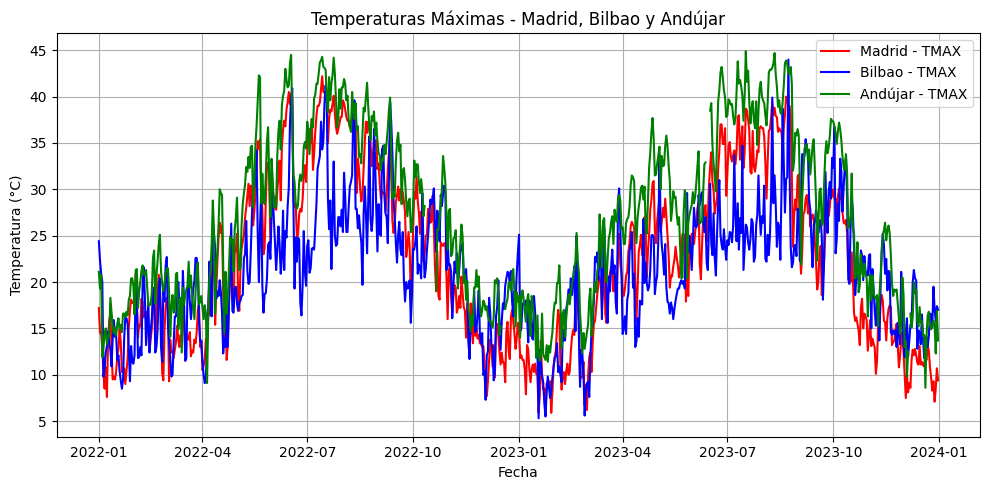

In [5]:
# Crear el gráfico
plt.figure(figsize=(10, 5))

# Madrid
plt.plot(df_mad['FECHA'], df_mad['T.MaximaM'], label='Madrid - TMAX', linestyle='-', color='red')
# Bilbao
plt.plot(df_bilb['FECHA'], df_bilb['T.MaximaB'], label='Bilbao - TMAX', linestyle='-', color='blue')
# Andújar
plt.plot(df_and['FECHA'], df_and['T.MaximaAnjudar'], label='Andújar - TMAX', linestyle='-', color='green')
# Personalización
plt.title('Temperaturas Máximas - Madrid, Bilbao y Andújar')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar
plt.show()

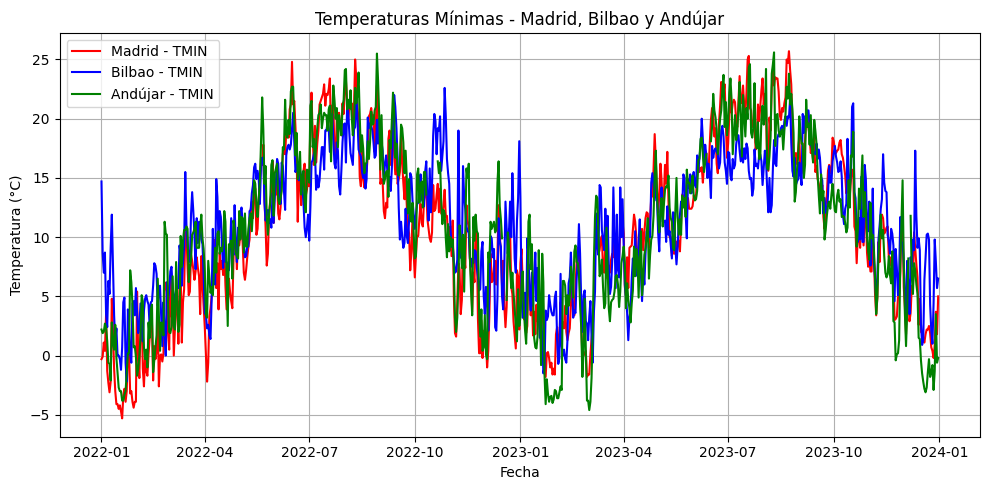

In [6]:
# Crear el gráfico
plt.figure(figsize=(10, 5))

# Madrid
plt.plot(df_mad['FECHA'], df_mad['T.MinimaM'], label='Madrid - TMIN', linestyle='-', color='red')
# Bilbao
plt.plot(df_bilb['FECHA'], df_bilb['T.MinimaB'], label='Bilbao - TMIN', linestyle='-', color='blue')
# Andújar
plt.plot(df_and['FECHA'], df_and['T.minimaAndujar'], label='Andújar - TMIN', linestyle='-', color='green')
# Personalización
plt.title('Temperaturas Mínimas - Madrid, Bilbao y Andújar')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar
plt.show()

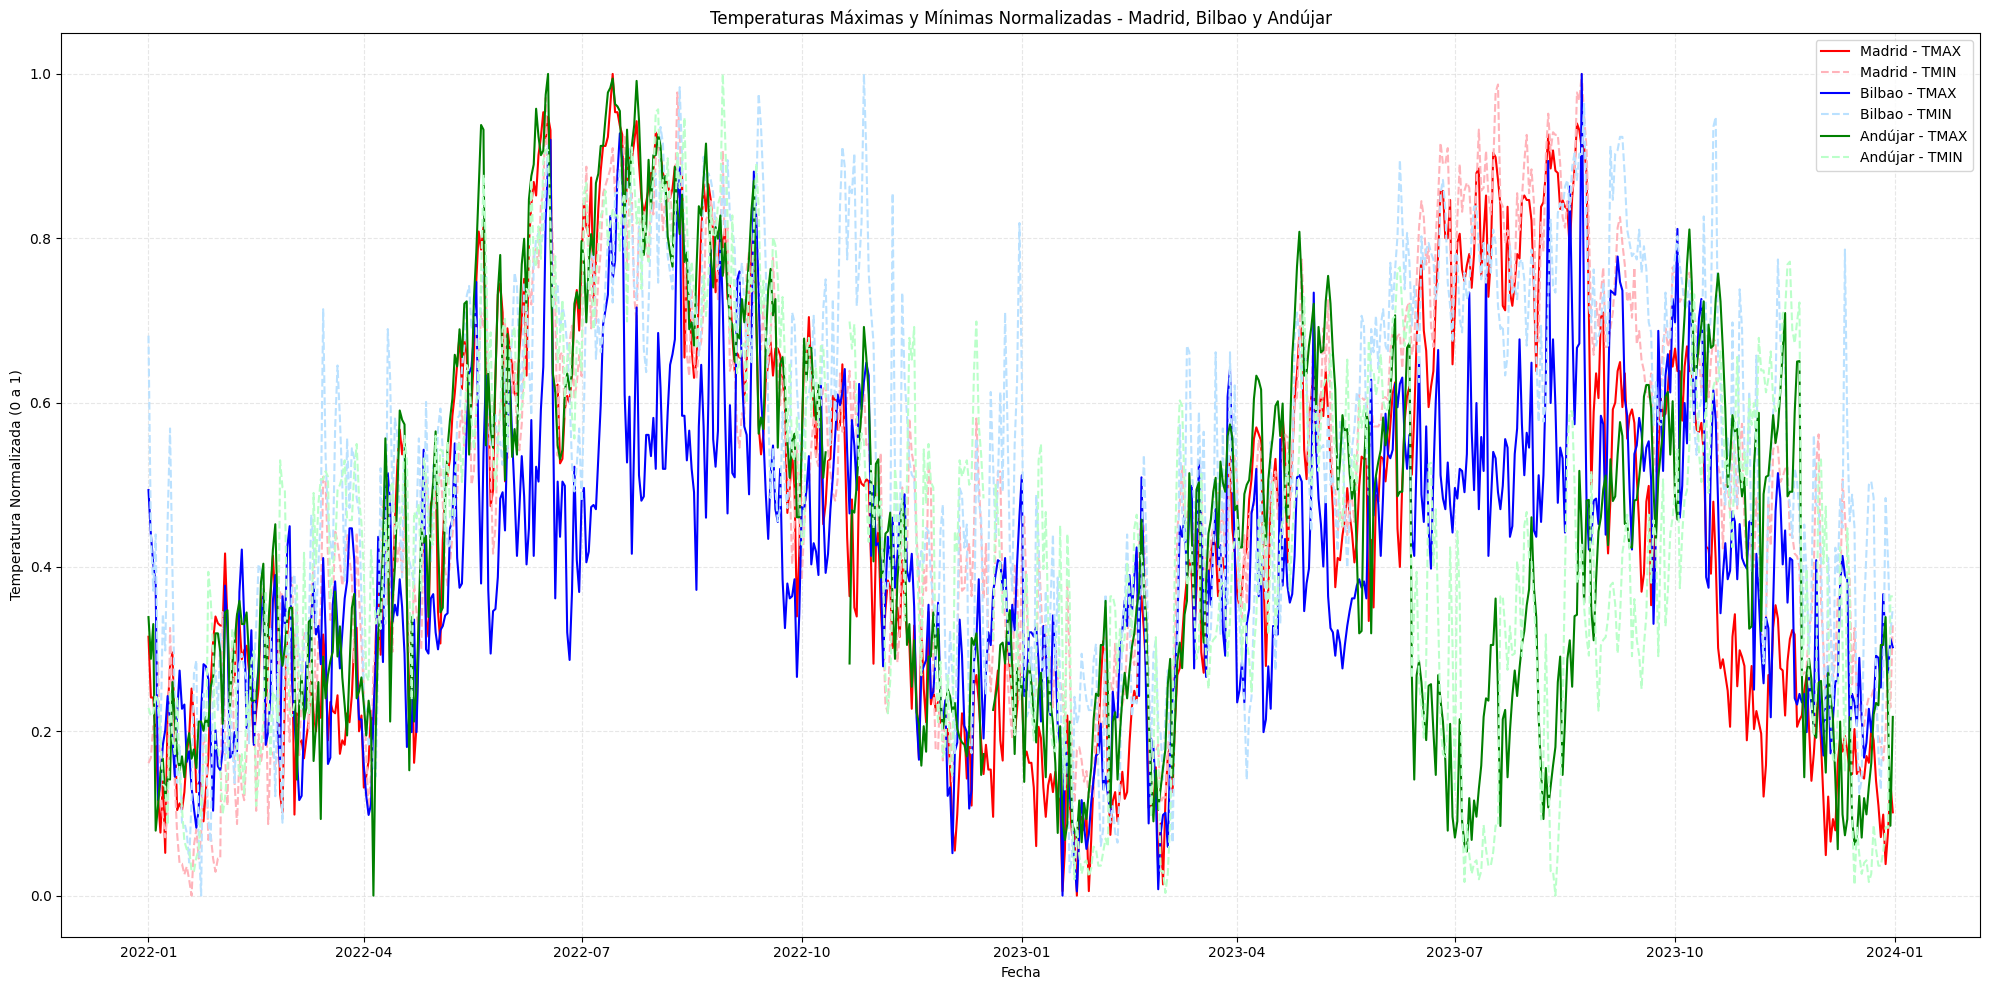

In [7]:
# Función de normalización min-max
def normalizar_columna(serie):
    return (serie - serie.min()) / (serie.max() - serie.min())

# Ordenar por fecha
df_mad = df_mad.sort_values('FECHA')
df_bilb = df_bilb.sort_values('FECHA')
df_and = df_and.sort_values('FECHA')

# Normalizar temperaturas
df_mad['TMAX_norm'] = normalizar_columna(df_mad['T.MaximaM'])
df_mad['TMIN_norm'] = normalizar_columna(df_mad['T.MinimaM'])

df_bilb['TMAX_norm'] = normalizar_columna(df_bilb['T.MaximaB'])
df_bilb['TMIN_norm'] = normalizar_columna(df_bilb['T.MinimaB'])

df_and['TMAX_norm'] = normalizar_columna(df_and['T.MaximaAnjudar'])
df_and['TMIN_norm'] = normalizar_columna(df_and['T.minimaAndujar'])

# Crear el gráfico
plt.figure(figsize=(20, 10))

# Madrid
plt.plot(df_mad['FECHA'], df_mad['TMAX_norm'], label='Madrid - TMAX', linestyle='-', color='red')
plt.plot(df_mad['FECHA'], df_mad['TMIN_norm'], label='Madrid - TMIN', linestyle='--', color='#FFB3BA')

# Bilbao
plt.plot(df_bilb['FECHA'], df_bilb['TMAX_norm'], label='Bilbao - TMAX', linestyle='-', color='blue')
plt.plot(df_bilb['FECHA'], df_bilb['TMIN_norm'], label='Bilbao - TMIN', linestyle='--', color='#BAE1FF')

# Andújar
plt.plot(df_and['FECHA'], df_and['TMAX_norm'], label='Andújar - TMAX', linestyle='-', color='green')
plt.plot(df_and['FECHA'], df_and['TMIN_norm'], label='Andújar - TMIN', linestyle='--', color='#BAFFC9')

# Personalización
plt.title('Temperaturas Máximas y Mínimas Normalizadas - Madrid, Bilbao y Andújar')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Normalizada (0 a 1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

# Mostrar
plt.show()
